In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
stations = pd.read_csv('stations.csv')
station_day = pd.read_csv('station_day.csv')

df = pd.merge(station_day, stations, on='StationId', how='inner')
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State,Status
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active


In [ ]:
print(df)

       StationId        Date  PM2.5    PM10     NO     NO2     NOx    NH3  \
0          AP001  2017-11-24  71.36  115.75   1.75   20.65   12.40  12.19   
1          AP001  2017-11-25  81.40  124.50   1.44   20.50   12.08  10.72   
2          AP001  2017-11-26  78.32  129.06   1.26   26.00   14.85  10.28   
3          AP001  2017-11-27  88.76  135.32   6.60   30.85   21.77  12.91   
4          AP001  2017-11-28  64.18  104.09   2.56   28.07   17.01  11.42   
...          ...         ...    ...     ...    ...     ...     ...    ...   
108030     WB013  2020-06-27   8.65   16.46    NaN     NaN     NaN    NaN   
108031     WB013  2020-06-28  11.80   18.47    NaN     NaN     NaN    NaN   
108032     WB013  2020-06-29  18.60   32.26  13.65  200.87  214.20  11.40   
108033     WB013  2020-06-30  16.07   39.30   7.56   29.13   36.69  29.26   
108034     WB013  2020-07-01  10.50   36.50   7.78   22.50   30.25  27.23   

          CO    SO2      O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket 

In [ ]:
print(df.isnull().sum())

StationId          0
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
StationName        0
City               0
State              0
Status           324
dtype: int64


In [ ]:
pollutant_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
df[pollutant_columns] = df[pollutant_columns].fillna(df[pollutant_columns].median())
'''
df = df.dropna()

df = df.drop_duplicates()
'''

'\ndf = df.dropna()\n\ndf = df.drop_duplicates()\n'

In [ ]:
print(df.isnull().sum())

StationId          0
Date               0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
AQI            21010
AQI_Bucket     21010
StationName        0
City               0
State              0
Status           324
dtype: int64


                count        mean         std    min     25%    50%    75%  \
AQI_Bucket                                                                   
Good           5510.0   39.801270    8.141530    8.0   34.25   42.0   46.0   
Moderate      29417.0  138.930924   28.023058  101.0  114.00  134.0  160.0   
Poor          11493.0  247.661707   29.537546  201.0  221.00  246.0  274.0   
Satisfactory  23636.0   76.795439   14.194043   51.0   65.00   77.0   89.0   
Severe         5207.0  511.560015  148.195853  401.0  426.00  466.0  544.0   
Very Poor     11762.0  341.033838   26.925688  301.0  318.00  337.0  361.0   

                 max  
AQI_Bucket            
Good            50.0  
Moderate       200.0  
Poor           300.0  
Satisfactory   100.0  
Severe        2049.0  
Very Poor      400.0  


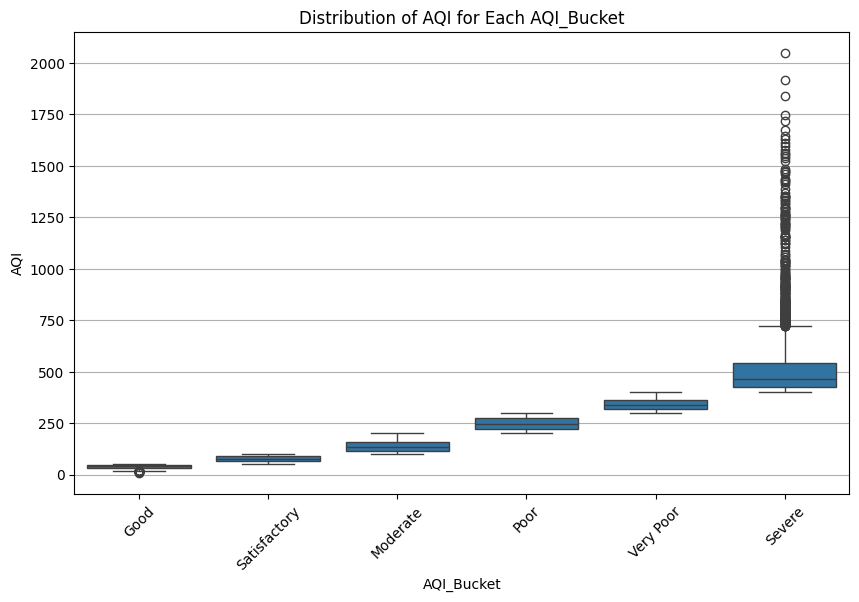

In [ ]:
bucket_ranges = df.groupby('AQI_Bucket')['AQI'].describe()

print(bucket_ranges)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=df, order=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.title('Distribution of AQI for Each AQI_Bucket')
plt.ylabel('AQI')
plt.xlabel('AQI_Bucket')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

train_data = df[~df['AQI'].isnull()]

test_data = df[df['AQI'].isnull()]

reg = LinearRegression()
reg.fit(train_data[features], train_data[target])

df.loc[df['AQI'].isnull(), 'AQI'] = reg.predict(test_data[features])


In [ ]:
# Function to classify AQI_Bucket based on AQI values
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Apply the function to fill AQI_Bucket based on AQI
df['AQI_Bucket'] = df['AQI'].apply(classify_aqi)

# Check the distribution of AQI_Bucket to ensure it's classified properly
print(df['AQI_Bucket'].value_counts())

AQI_Bucket
Moderate        48336
Satisfactory    24329
Poor            12235
Very Poor       12058
Good             5610
Severe           5467
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())

StationId        0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket       0
StationName      0
City             0
State            0
Status         324
dtype: int64


In [ ]:
df = df.drop('Status', axis=1)


In [ ]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,StationName,City,State
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,156.649829,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.000000,Moderate,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh


In [ ]:
print(df.columns)

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State'],
      dtype='object')


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000,108035.000000
mean,75.404005,143.785763,21.091411,34.010742,39.109682,26.442895,1.522042,11.485980,36.408410,2.732618,11.399286,0.828869,172.755626
std,69.128573,97.563192,31.987720,27.310521,42.091568,18.719146,4.104542,11.455365,34.326055,9.443295,24.097106,3.092343,121.665930
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,37.430000,102.620000,5.770000,17.100000,15.940000,21.260000,0.590000,6.160000,22.580000,0.440000,2.130000,0.400000,95.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,136.049482
75%,83.795000,144.955000,20.740000,42.240000,45.040000,26.000000,1.350000,12.570000,41.020000,2.350000,7.870000,0.400000,219.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


#**EDA**

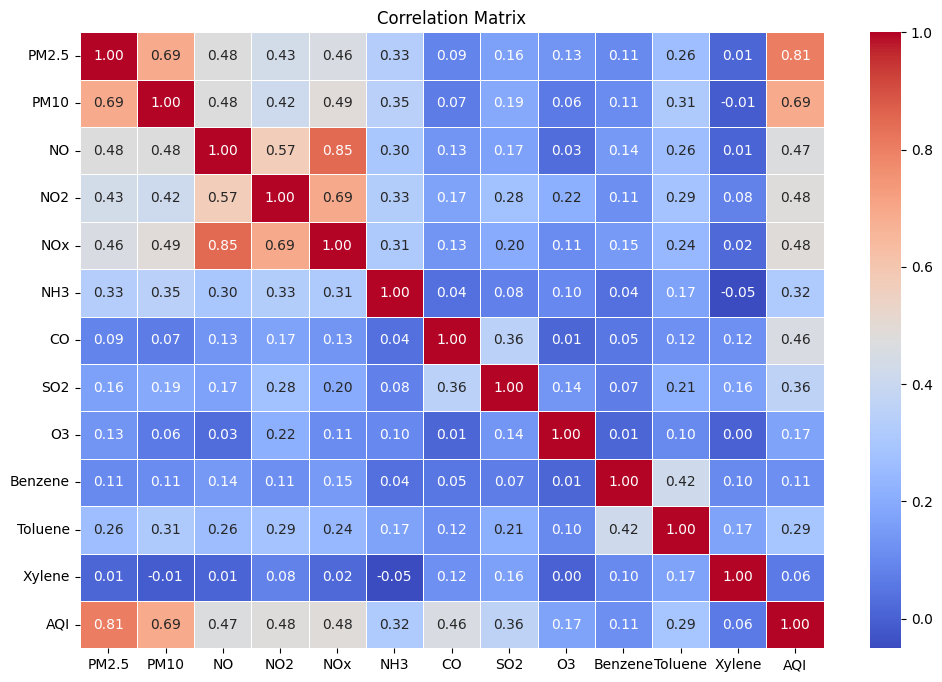

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

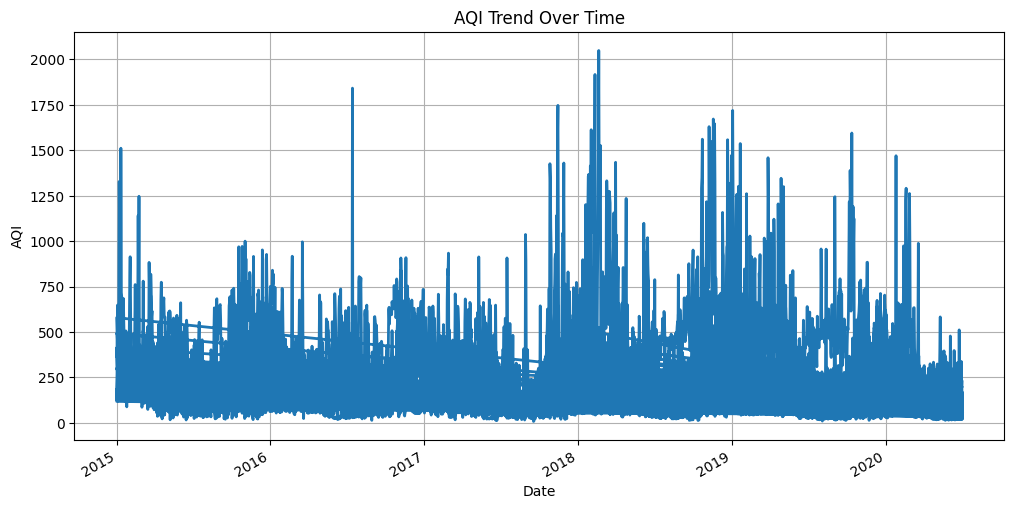

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
df['AQI'].plot(linewidth=2)
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


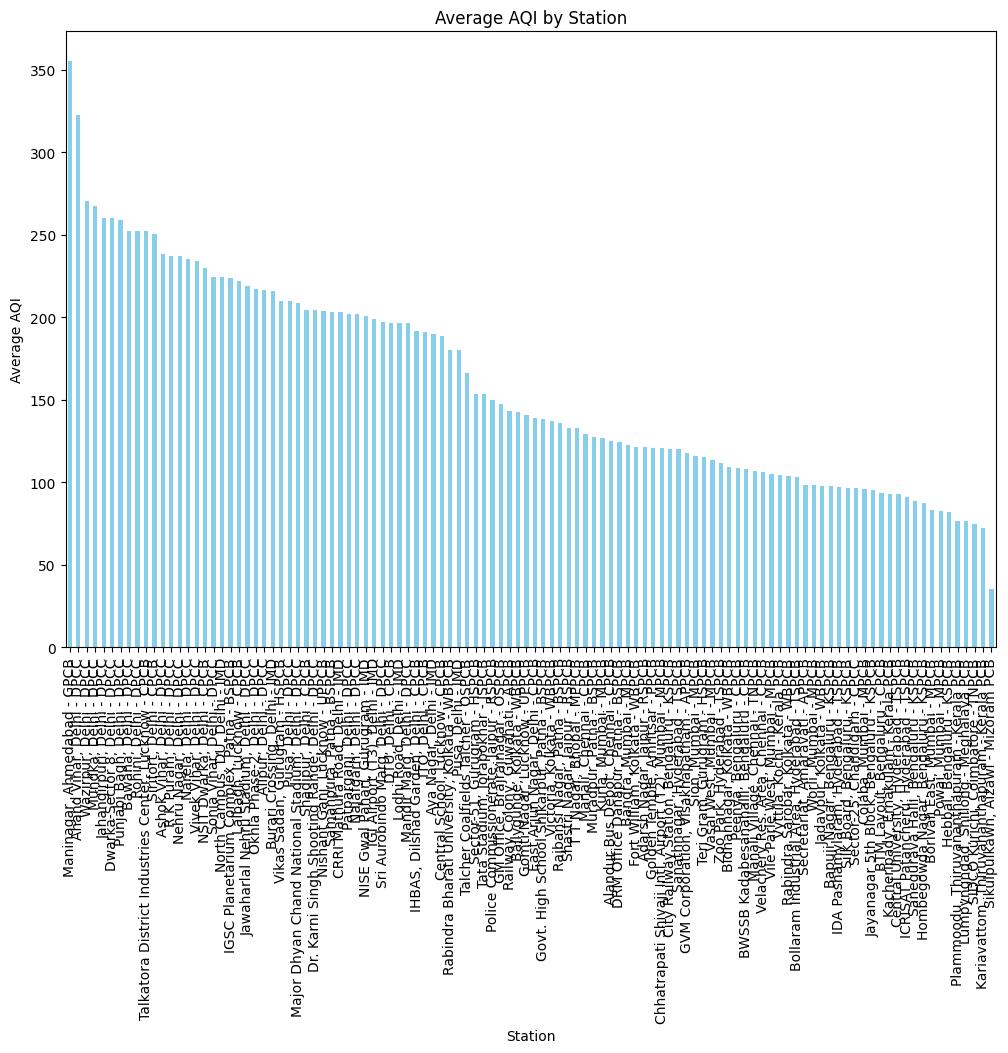

In [ ]:
# Group by Station and calculate mean AQI
station_aqi = df.groupby('StationName')['AQI'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
station_aqi.plot(kind='bar', color='skyblue')
plt.title('Average AQI by Station')
plt.xlabel('Station')
plt.ylabel('Average AQI')
plt.xticks(rotation=90)
plt.show()


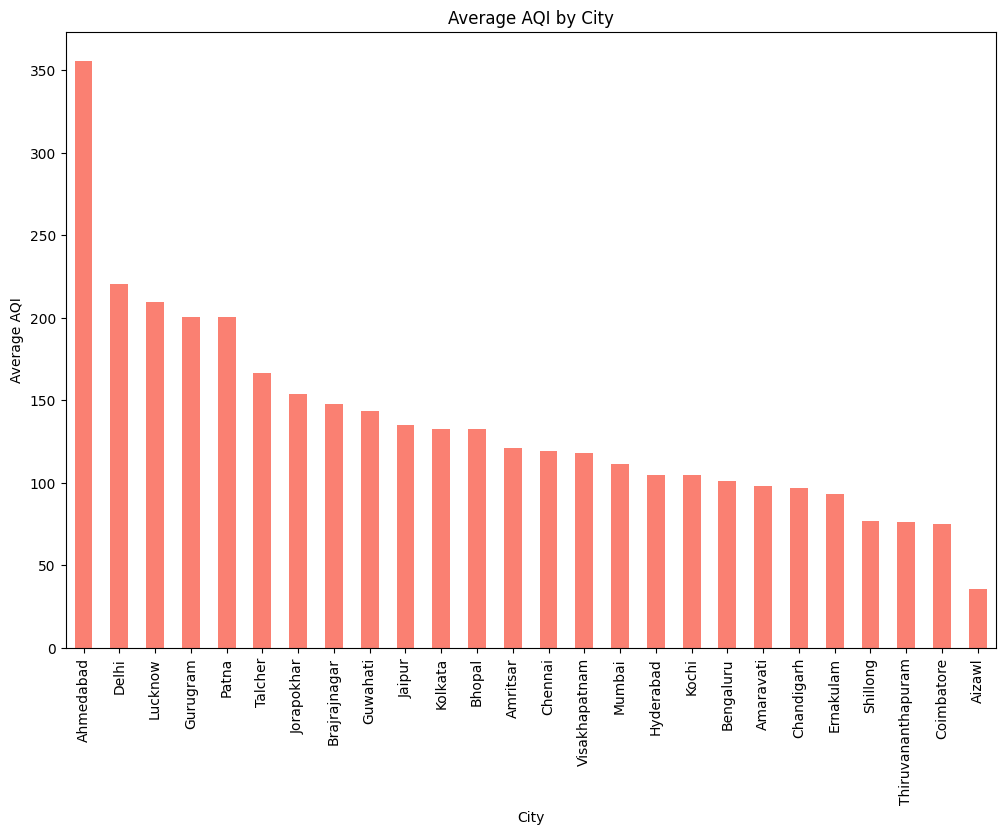

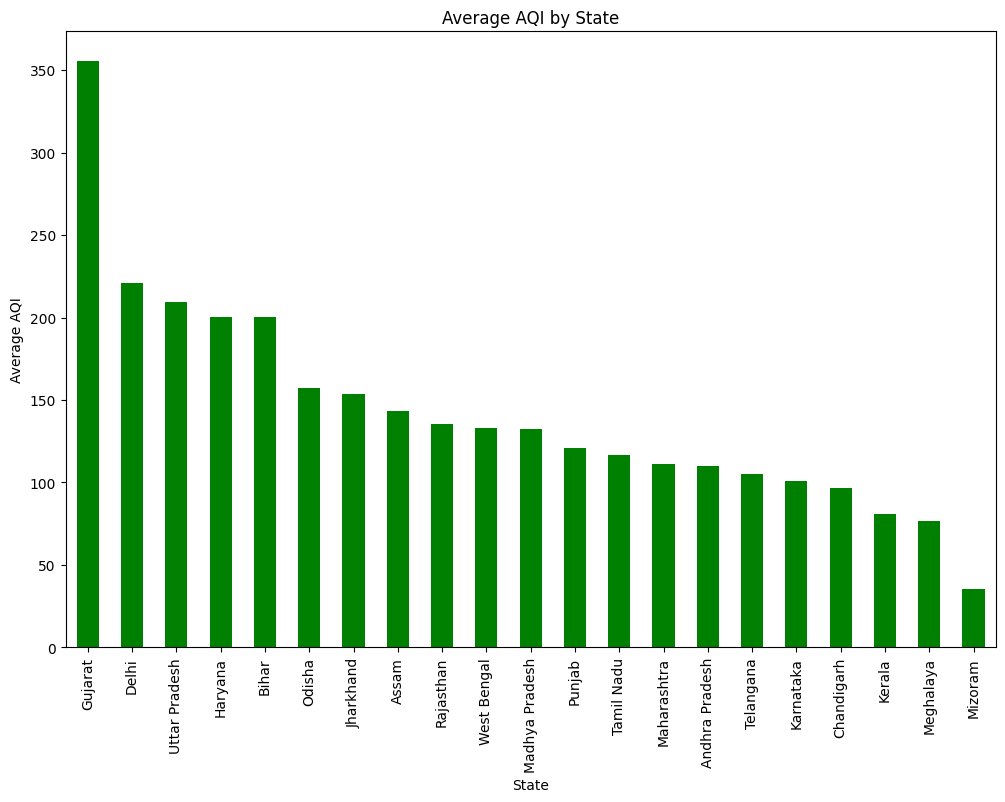

In [ ]:
# Group by City and calculate mean AQI
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# Plot AQI by City
plt.figure(figsize=(12, 8))
city_aqi.plot(kind='bar', color='salmon')
plt.title('Average AQI by City')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.xticks(rotation=90)
plt.show()

# Group by State and calculate mean AQI
state_aqi = df.groupby('State')['AQI'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
state_aqi.plot(kind='bar', color='green')
plt.title('Average AQI by State')
plt.xlabel('State')
plt.ylabel('Average AQI')
plt.xticks(rotation=90)
plt.show()


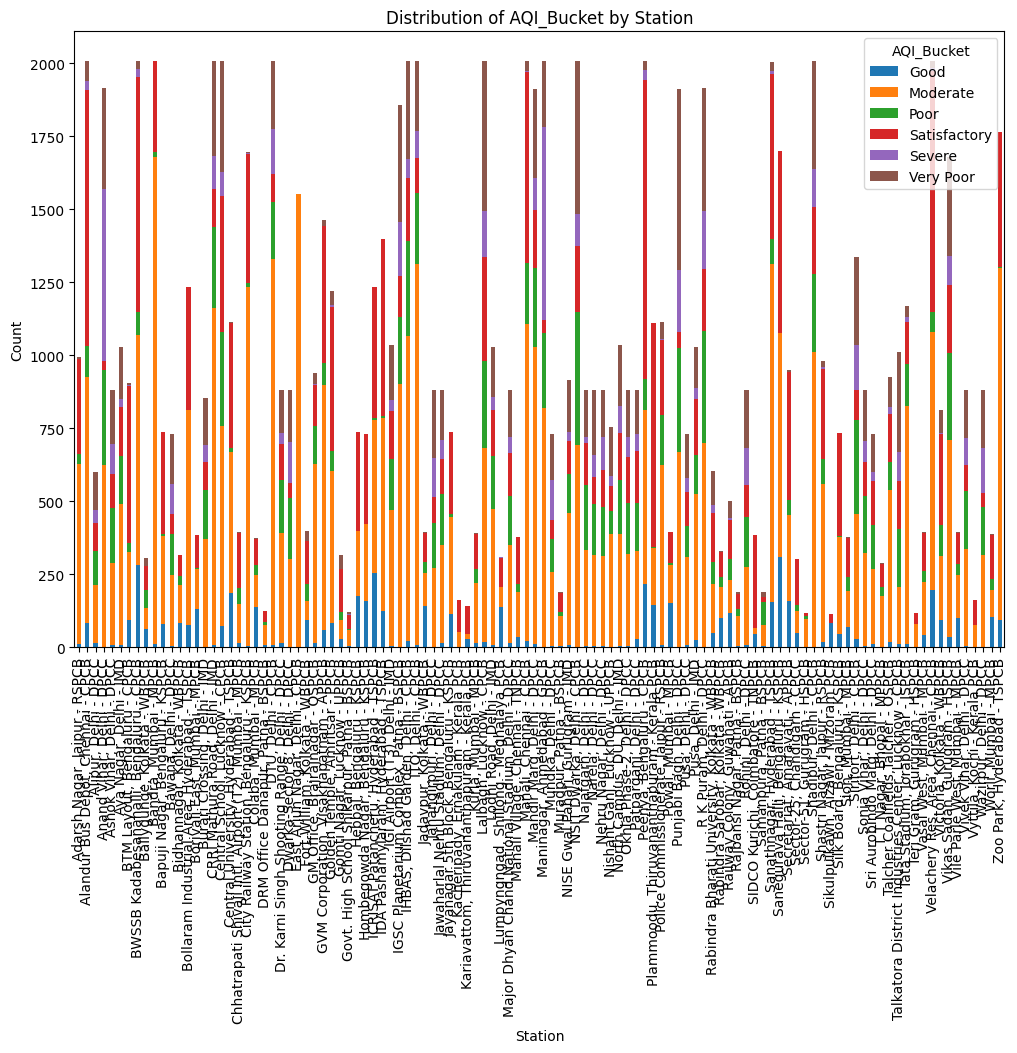

In [ ]:
# Count the AQI_Bucket distribution by Station
station_bucket_dist = df.groupby('StationName')['AQI_Bucket'].value_counts().unstack().fillna(0)

station_bucket_dist.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of AQI_Bucket by Station')
plt.xlabel('Station')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


#**ML model**#

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Features and target
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

# Dropping rows with missing values in features or target (if any)
df = df.dropna(subset=features + [target])

# Splitting data into features (X) and target (y)
X = df[features].values
y = df[target].values

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features for better neural network performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defining and compiling the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=32, verbose=1)

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss}')

# Predicting AQI for test data
y_pred = model.predict(X_test)

# Optional: Reverse scaling predictions if AQI values were scaled earlier
# y_pred = scaler.inverse_transform(y_pred)

# Visualizing training and validation loss over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14384.3291 - val_loss: 2263.6074
Epoch 2/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1964.0431 - val_loss: 1756.3013
Epoch 3/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1611.9406 - val_loss: 1620.4247
Epoch 4/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1496.0669 - val_loss: 1553.1281
Epoch 5/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1531.7509 - val_loss: 1551.5226
Epoch 6/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1430.9938 - val_loss: 1515.1241
Epoch 7/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1443.8296 - val_loss: 1473.4684
Epoch 8/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1375.5555 - val_loss: 1474.6470
Epoch 9/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 1464.2137 - val_loss: 1489.5421
Epoch 10/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1395.4550 - val_loss: 1545.8276
Epoch 11/300
2161/2161 ━━━━━━━━━━━━━━━━━━━━ 4s 2

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Function to map AQI to buckets
def map_aqi_to_bucket(aqi):
    if aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Satisfactory'
    elif 101 <= aqi <= 200:
        return 'Moderate'
    elif 201 <= aqi <= 300:
        return 'Poor'
    elif 301 <= aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Map predicted AQI to buckets
y_pred_buckets = np.array([map_aqi_to_bucket(aqi) for aqi in y_pred.flatten()])
y_test_buckets = np.array([map_aqi_to_bucket(aqi) for aqi in y_test])

# Compute classification metrics
accuracy = accuracy_score(y_test_buckets, y_pred_buckets)
precision = precision_score(y_test_buckets, y_pred_buckets, average='weighted')
recall = recall_score(y_test_buckets, y_pred_buckets, average='weighted')
f1 = f1_score(y_test_buckets, y_pred_buckets, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test_buckets, y_pred_buckets))


Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-Score: 0.79

Classification Report:
              precision    recall  f1-score   support

        Good       0.77      0.53      0.63      1116
    Moderate       0.86      0.86      0.86      9642
        Poor       0.65      0.70      0.67      2472
Satisfactory       0.74      0.78      0.76      4820
      Severe       0.71      0.78      0.74      1103
   Very Poor       0.80      0.72      0.76      2454

    accuracy                           0.79     21607
   macro avg       0.75      0.73      0.74     21607
weighted avg       0.79      0.79      0.79     21607



In [ ]:
import warnings
warnings.filterwarnings("ignore")

user_input = pd.DataFrame({
    'PM2.5': [14.41],
    'PM10': [66.81],
    'NO': [6.22],
    'NO2': [40.06],
    'NOx': [26.1],
    'NH3': [7.51],
    'CO': [1.07],
    'SO2': [13.23],
    'O3': [27.34],
    'Benzene': [2.55],
    'Toluene': [8.98],
    'Xylene': [1.45]
})

user_input_scaled = scaler.transform(user_input)

user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted AQI: 79.4886474609375


In [ ]:
if user_pred[0][0] <= 50:
  print("Good")
elif user_pred[0][0] > 50 and user_pred[0][0] <= 100:
  print("Moderate")
elif user_pred[0][0] > 100 and user_pred[0][0] <= 200:
  print("Poor")
elif user_pred[0][0] > 200 and user_pred[0][0] <= 300:
  print("Unhealthy")
elif user_pred[0][0] > 300 and user_pred[0][0] <= 400:
  print("Severe")
else:
  print("Hazardous")

Moderate


Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with relevant features and target (AQI)
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']]  # Example features
y = df['AQI']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Squared (R2): {r2}')

# Make prediction on new data (example input)
user_input = pd.DataFrame({
    'PM2.5': [14.41],
    'PM10': [66.81],
    'NO': [6.22],
    'NO2': [40.06],
    'NOx': [26.1],
    'NH3': [7.51],
    'CO': [1.07],
    'SO2': [13.23],
    'O3': [27.34],
    'Benzene': [2.55],
    'Toluene': [8.98],
    'Xylene': [1.45]
})

user_input_scaled = scaler.transform(user_input)

# Predict AQI for new data
user_pred = lr_model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0]}")


Mean Squared Error (MSE): 2272.6629855064866
Root Mean Squared Error (RMSE): 47.67245520745168
Mean Absolute Error (MAE): 28.709206758371653
R-Squared (R2): 0.8485542987254915
Predicted AQI: 83.37943025159063
